In [74]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
# pyfolio  qgrid empyrical
import pickle
import numpy as np
import time
import seaborn as sns
from itertools import combinations
import multiprocessing as mp
from tqdm import tqdm
import sys
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
current_path = os.getcwd()

In [3]:
sys.path.append('C:\\Users\\Rafael\\Trading\\Trading')

In [381]:
import TradingModule as td

In [90]:
td1 =td.estrategias()

In [91]:
data1['BBAS3.SA']

Date
2014-12-22    18.839794
2014-12-23    18.770786
2014-12-24    18.770786
2014-12-25    18.770786
2014-12-26    18.824457
                ...    
2019-12-16    47.869999
2019-12-17    48.950001
2019-12-18    50.639999
2019-12-19    51.160000
2019-12-20    50.459999
Name: BBAS3.SA, Length: 1305, dtype: float64

In [94]:
teste=td1.estrat_mmovel(data1['BBAS3.SA'],50,10)

Date
2014-12-22    18.839794
2014-12-23    18.770786
2014-12-24    18.770786
2014-12-25    18.770786
2014-12-26    18.824457
                ...    
2019-12-16    47.869999
2019-12-17    48.950001
2019-12-18    50.639999
2019-12-19    51.160000
2019-12-20    50.459999
Name: BBAS3.SA, Length: 1305, dtype: float64 1


In [115]:
td2=td.estrategias()

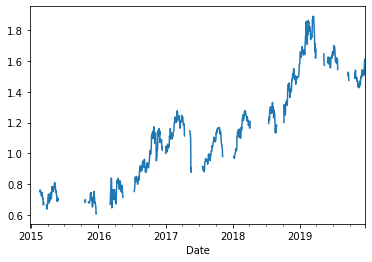

In [117]:
teste.apply(td2.estrat_retornos,axis=1).plot()

In [159]:
pd.concat([teste,teste2],keys=['BBAS3.SA'], names=['Firstlevel'],axis=1)

Firstlevel   BBAS3.SA                         
             BBAS3.SA      roll DECISAO ESTRAT
Date                                          
2014-12-26  18.824457  0.000000   VENDA  VENDA
2014-12-29  18.632763  0.000000   VENDA    NaN
2014-12-30  18.226370  0.000000   VENDA    NaN
2014-12-31  18.226370  0.000000   VENDA    NaN
2015-01-01  18.226370  0.000000   VENDA    NaN
...               ...       ...     ...    ...
2019-12-16  47.869999  2.076828  COMPRA    NaN
2019-12-17  48.950001  2.147765  COMPRA    NaN
2019-12-18  50.639999  2.294043  COMPRA    NaN
2019-12-19  51.160000  2.524387  COMPRA    NaN
2019-12-20  50.459999  2.711755  COMPRA    NaN

[1301 rows x 4 columns]

In [466]:
y=data1['ABEV3.SA']
y=y.rename('DROPAR')
for i in data1.columns:
    td1 =td.estrategias()
    teste=td1.estrat_mmovel(data1[i],150,20)
    td2=td.estrategias()
    teste2=teste.apply(td2.estrat_retornos1,axis=1)
    teste2=pd.DataFrame(teste2)
    teste2.columns=['RETORNOS']
    
    teste2= pd.concat([teste,teste2],axis=1)
    teste2 =pd.concat([teste2], keys=[i], names=['ACAO'],axis=1)
    
    y=pd.concat([teste2,y],axis=1)

In [467]:
y=y.drop(['DROPAR'],axis=1)

In [468]:
y.columns=pd.MultiIndex.from_tuples(y.columns.to_list())

In [469]:
result=''
def stop(valores,gain=1000000000,loss=10000000000):
    global result
    if valores['RETORNOS']>gain:
        result='VENDA'
        return ('VENDA')
    elif valores['RETORNOS']<loss:
        result='VENDA'
        return( 'VENDA')
    elif result=='VENDA' and  valores['DECISAO']=='COMPRA':
        return('VENDA')
    elif result=='VENDA' and  valores['DECISAO']=='VENDA':
        result='COMPRA'
        return ('VENDA')
    else:
        return valores['DECISAO']

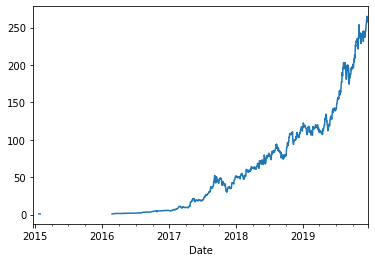

In [487]:
y[('MGLU3.SA','RETORNOS')].plot()

In [471]:
for i in data1.columns:

    y[(i,'DECISAO')]=y[i][['DECISAO','RETORNOS']].apply(stop,args=(100000,0.90),axis=1)
    tds =td.estrategias()
    y[i,'ESTRAT']=y[i,'DECISAO'].apply(tds.estrat)
    td2=td.estrategias()
    teste2=y[i].apply(td2.estrat_retornos1,axis=1)
    y[(i,'RETORNOS')]=teste2
    td2=td.estrategias()
    
    y[i,'RETORNO_TOT']= y[i].apply(td2.estrat_retornos,axis=1)

In [503]:
ret=((retorno-retorno.shift(-1))/retorno)

In [513]:
(((ret-bvsp)/np.std((ret-bvsp)))).mean()

0.024271954991807048

In [502]:
bvsp=((y['^BVSP','^BVSP']-y['^BVSP','^BVSP'].shift(-1))/(y['^BVSP','^BVSP']))

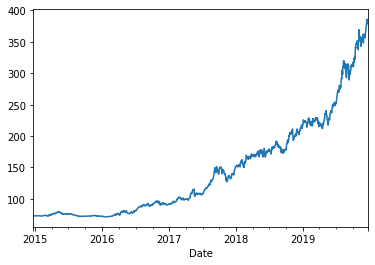

In [485]:
y.xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1).plot()

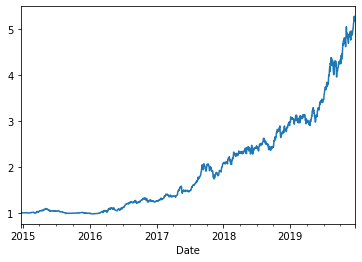

In [474]:
(y.xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1)/73).plot()

In [496]:
retorno=y.drop('MGLU3.SA',axis=1).xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1)

In [501]:
((retorno-retorno.shift(-1))/retorno)

Date
2014-12-22    0.000000
2014-12-23    0.000000
2014-12-24    0.000000
2014-12-25    0.000000
2014-12-26    0.000000
                ...   
2019-12-16    0.000851
2019-12-17   -0.011590
2019-12-18   -0.006817
2019-12-19    0.001526
2019-12-20         NaN
Length: 1305, dtype: float64

In [408]:
tds =td.estrategias()

In [409]:
y['ELET6.SA','ESTRAT']=y['ELET6.SA','DECISAO'].apply(tds.estrat)

In [410]:
td2=td.estrategias()
teste2=y['ELET6.SA'].apply(td2.estrat_retornos1,axis=1)

In [411]:
y[('ELET6.SA','RETORNOS')]=teste2

In [412]:
td2=td.estrategias()

In [413]:
y['ELET6.SA'].apply(td2.estrat_retornos,axis=1                   ).dropna()

Date
2015-01-06    1.039795
2015-01-07    1.075738
2015-01-08    1.041078
2015-01-09    0.982028
2015-01-12    0.996149
                ...   
2019-10-04    2.341845
2019-10-07    2.187017
2019-10-08    2.159023
2019-10-09    2.163593
2019-10-10    2.141883
Length: 612, dtype: float64

In [434]:
y['ELET6.SA'].dropna(subset=['ESTRAT'])['RETORNOS'].dropna().product()

2.1418829470376455

In [170]:
y=data1['ABEV3.SA']
y=y.rename('DROPAR')
for i in data1.columns:
    td1 =td.estrategias()
    teste=td1.estrat_mmovel(data1[i],100,10)
    td2=td.estrategias()
    teste2=teste.apply(td2.estrat_retornos,axis=1)
    teste2.rename(i)
    
    
    y=pd.concat([teste2,y],axis=1)

In [199]:
y=data1['ABEV3.SA']
y=y.rename('DROPAR')
for i in data1.columns:
    td1 =td.estrategias()
    teste=td1.estrat_mmovel(data1[i],100,10)
    td2=td.estrategias()
    teste2=teste.apply(td2.estrat_retornos1,axis=1)
    teste2.rename(i)
    
    
    y=pd.concat([teste2,y],axis=1)

In [167]:
y.columns

Index([      ('^N225', '^N225'),        ('^N225', 'roll'),
           ('^N225', 'DECISAO'),      ('^N225', 'ESTRAT'),
             ('^BVSP', '^BVSP'),        ('^BVSP', 'roll'),
           ('^BVSP', 'DECISAO'),      ('^BVSP', 'ESTRAT'),
       ('YDUQ3.SA', 'YDUQ3.SA'),     ('YDUQ3.SA', 'roll'),
       ...
         ('B3SA3.SA', 'ESTRAT'), ('AZUL4.SA', 'AZUL4.SA'),
           ('AZUL4.SA', 'roll'),  ('AZUL4.SA', 'DECISAO'),
         ('AZUL4.SA', 'ESTRAT'), ('ABEV3.SA', 'ABEV3.SA'),
           ('ABEV3.SA', 'roll'),  ('ABEV3.SA', 'DECISAO'),
         ('ABEV3.SA', 'ESTRAT'),                 'DROPAR'],
      dtype='object', length=293)

In [5]:
with open('C:\\Users\\Rafael\\Trading\\Trading\\ibov.pkl','rb') as file:
     data =pickle.load(file)
data1 =data['Adj Close']

In [6]:
import parallel as pl

In [7]:
pd.options.mode.chained_assignment = None

In [54]:
inic =''

def estrat(x):
    global inic
   
    if inic!=x:
        inic = x
        return x
    
    else:
        return np.nan


def rollmeanstrat(serie,longmean=100,shortmean=10):
    start_time = time.clock()

    serie =pd.DataFrame(serie)

    



    serie['roll']   =  serie.rolling(shortmean,min_periods=5).mean()-serie.rolling(longmean,min_periods=5).mean()
    

    serie['DECISAO']=np.nan
    
    serie.loc[serie['roll']>0.0,'DECISAO']='COMPRA'
    serie.loc[serie['roll']<=0.0,'DECISAO'] ='VENDA'
    serie=serie.dropna()
    serie['ESTRAT'] =serie['DECISAO'].apply(func=estrat)

   
    
    return serie
def returns(serie,tipo_oper ='COMPRA'):
    start_time = time.clock()
    
    serie=serie.dropna()
    
    serie['LUCRO']= serie.iloc[:,0].shift(-1)/(serie.iloc[:,0])
   
    
    serie= serie.loc[(serie['ESTRAT']==tipo_oper) & (pd.notna(serie['LUCRO']))]
    
    
   
    
   
    retorno_total=serie['LUCRO'].rolling(len(serie )).apply(np.prod, raw=True).dropna()
   
    return retorno_total

In [11]:
start_time = time.clock()
x =rollmeanstrat(data1['BBAS3.SA'],100,50)
print (1,time.clock() - start_time, "seconds")

1 0.0606168000000018 seconds


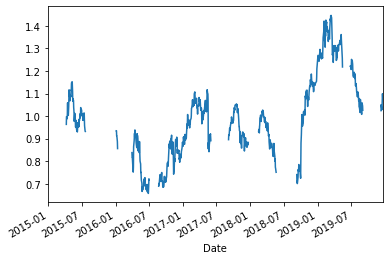

In [12]:
x.plot()

In [17]:
x

Date
2014-12-30         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
                ...   
2019-12-16    1.028603
2019-12-17    1.051810
2019-12-18    1.088124
2019-12-19    1.099297
2019-12-20    1.084256
Length: 1238, dtype: float64

In [41]:
data1=data1.fillna(method='ffill')

In [13]:
x['BBAS3.SA'].reset_index(drop=True).plot()

KeyError: 'BBAS3.SA'

In [42]:
n =''
zero=0
prev_res=0
def func(x):
    global n
    global zero 
    global prev_res
     
    if x['DECISAO']=='COMPRA' and x['DECISAO']!=n  :
        zero=x.iloc[0]
        n='COMPRA'
    elif    x['DECISAO']=='COMPRA' and x['DECISAO']==n  :
        if prev_res!=0:
            return((x.iloc[0]/zero)*prev_res)
        else: 
            return(x.iloc[0]/zero)
    elif x['DECISAO']=='VENDA' and n=='COMPRA':
        n='VENDA'
        if prev_res!=0:
            prev_res=(x.iloc[0]/zero*prev_res)
        else :
            prev_res = x.iloc[0]/zero
        
        return(prev_res)
    

In [43]:
x['retornos']=x.apply(func=func,axis=1)

TypeError: func() got an unexpected keyword argument 'axis'

In [16]:
x.dropna()

 result=serie.apply(func=func,axis=1)
    

Date
2015-04-09    0.963449
2015-04-10    0.997946
2015-04-13    0.995893
2015-04-14    0.988501
2015-04-15    1.027926
                ...   
2019-12-16    1.028603
2019-12-17    1.051810
2019-12-18    1.088124
2019-12-19    1.099297
2019-12-20    1.084256
Length: 700, dtype: float64

In [ ]:

todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(10), periods=10, freq='D')

In [18]:
data1=data1.drop(['NAN.SA'],axis=1)

In [150]:
teste

,BBAS3.SA,roll,DECISAO,ESTRAT
Date,,,,
2014-12-26,18.824457,0.000000,VENDA,VENDA
2014-12-29,18.632763,0.000000,VENDA,NaN
2014-12-30,18.226370,0.000000,VENDA,NaN
2014-12-31,18.226370,0.000000,VENDA,NaN
2015-01-01,18.226370,0.000000,VENDA,NaN
...,...,...,...,...
2019-12-16,47.869999,2.076828,COMPRA,NaN
2019-12-17,48.950001,2.147765,COMPRA,NaN
2019-12-18,50.639999,2.294043,COMPRA,NaN


In [19]:
n =''
zero=0
prev_res=0
inic =''

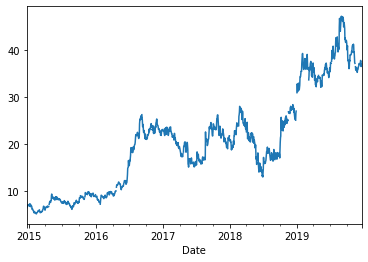

In [20]:
data1['ELET6.SA'].plot()

In [25]:

kk=rollmeanstrat(data1['AZUL4.SA'],80,20)

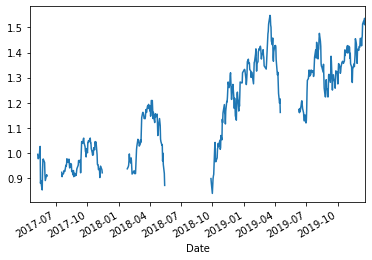

In [26]:
kk.plot()

In [27]:
kk[kk.index>'2019-01-01'].dropna()

 result=serie.apply(func=func,axis=1)
    

Date
2019-01-02    1.331988
2019-01-03    1.333455
2019-01-04    1.329055
2019-01-07    1.294225
2019-01-08    1.272960
                ...   
2019-12-16    1.524536
2019-12-17    1.513888
2019-12-18    1.533587
2019-12-19    1.536249
2019-12-20    1.510960
Length: 208, dtype: float64

             AZUL4.SA      roll DECISAO ESTRAT
Date                                          
2017-04-17  22.850000  0.000000   VENDA    NaN
2017-04-18  23.910000  0.000000   VENDA    NaN
2017-04-19  23.920000  0.000000   VENDA    NaN
2017-04-20  23.860001  0.000000   VENDA    NaN
2017-04-21  23.860001  0.000000   VENDA    NaN
...               ...       ...     ...    ...
2019-12-16  57.270000  2.569750  COMPRA    NaN
2019-12-17  56.869999  2.752625  COMPRA    NaN
2019-12-18  57.610001  2.970250  COMPRA    NaN
2019-12-19  57.709999  3.131250  COMPRA    NaN
2019-12-20  56.759998  3.115000  COMPRA    NaN

[700 rows x 4 columns]
             AZUL4.SA      roll DECISAO  ESTRAT
Date                                           
2017-05-09  25.799999  0.092357  COMPRA  COMPRA
2017-06-07  23.570000 -0.067952   VENDA   VENDA
2017-07-17  25.870001  0.007714  COMPRA  COMPRA
2017-11-14  26.440001 -0.041250   VENDA   VENDA
2018-01-26  30.010000  0.153500  COMPRA  COMPRA
2018-05-15  27.900000 -0.0868

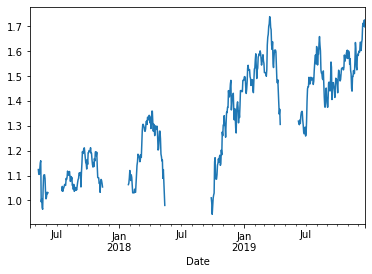

In [59]:
n =''
zero=0
prev_res=0
inic =''
y=data1['ABEV3.SA']
y=y.rename('DROPAR')
for i in data1.columns:
     
 
    x=rollmeanstrat(data1[i],80,20)
    result=x.apply(func=func,axis=1)
    if i=='AZUL4.SA':
        print(x)
        print(x.dropna())
        print(result.plot())
   
    result.rename(i)
    y=pd.concat([result,y],axis=1)

In [200]:
y.drop(['DROPAR'],axis=1,inplace=True)

In [201]:
y.columns=data1.columns

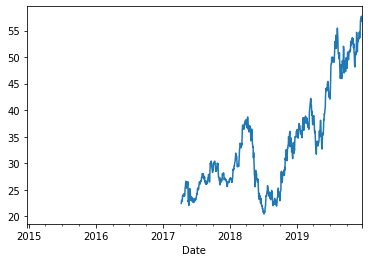

In [173]:
data1['AZUL4.SA'].plot()

In [174]:
y.drop(['ABEV3.SA'],axis=1).max()

AZUL4.SA    1.850509
B3SA3.SA    1.482697
BBAS3.SA    2.191609
BBDC3.SA    1.444922
BBDC4.SA    1.599658
              ...   
VVAR3.SA    2.410422
WEGE3.SA    1.327986
YDUQ3.SA    3.340258
^BVSP       1.900476
^N225       1.408453
Length: 72, dtype: float64

In [175]:
y.iloc[-1]

ABEV3.SA    1.025548
AZUL4.SA    1.850348
B3SA3.SA    1.461516
BBAS3.SA    2.190322
BBDC3.SA    1.432089
              ...   
VVAR3.SA    2.073613
WEGE3.SA    1.061926
YDUQ3.SA    3.271586
^BVSP       1.795986
^N225       1.241088
Name: 2019-12-20 00:00:00, Length: 73, dtype: float64

In [205]:
data1['ELET6.SA'].dropna().min()

5.152671813964844

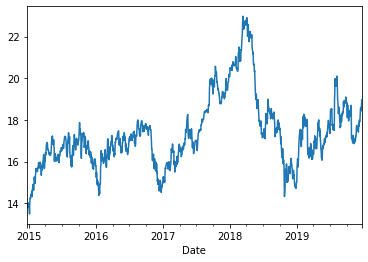

In [209]:
data1['ABEV3.SA'].plot()

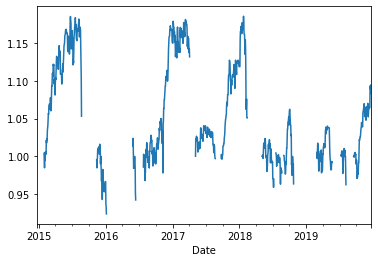

In [207]:
y['ABEV3.SA'].plot()

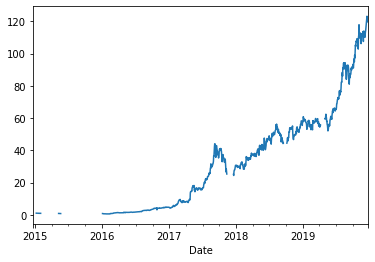

In [198]:
y['ELET6.SA'].plot()

In [183]:
y.idxmax()

ABEV3.SA   2018-01-23
AZUL4.SA   2019-12-19
B3SA3.SA   2019-12-19
BBAS3.SA   2019-12-13
BBDC3.SA   2019-12-18
              ...    
VVAR3.SA   2019-02-14
WEGE3.SA   2019-03-15
YDUQ3.SA   2019-11-11
^BVSP      2019-08-09
^N225      2018-03-14
Length: 73, dtype: datetime64[ns]

In [196]:
y.fillna(method='ffill')[y.index=='2019-12-20'].max().sort_values()

LREN3.SA       0.544079
CYRE3.SA       0.641715
RADL3.SA       0.677587
ENBR3.SA       0.812126
RAIL3.SA       0.826171
                ...    
CIEL3.SA       4.550223
GOAU4.SA       4.596657
KLBN11.SA      4.811241
BPAC11.SA      4.950993
ELET6.SA     120.705205
Length: 73, dtype: float64

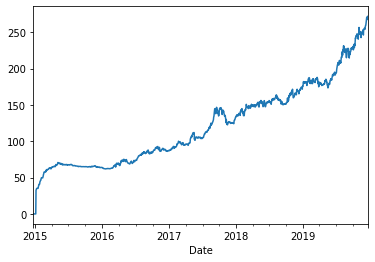

In [180]:
y.fillna(method='ffill').sum(axis=1).plot()

In [65]:
x['retornos'].plot()



KeyError: 'retornos'

In [131]:
data1["ABEV3.SA"] [data1.index==  '2015-01-07']

Date
2015-01-07    14.198765
Name: ABEV3.SA, dtype: float64

In [ ]:
['retornos'].rolling(8).apply(np.prod, raw=True)

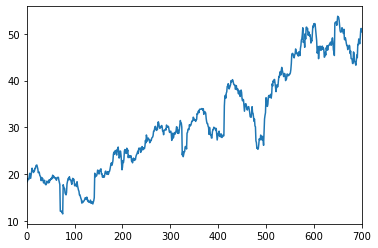

In [53]:
x[x['DECISAO']=='COMPRA']['BBAS3.SA'].reset_index(drop=True).plot()

In [48]:
x.dropna(subset=['ESTRAT'])

,BBAS3.SA,roll,DECISAO,ESTRAT
Date,,,,
2014-12-30,18.226370,0.000000,VENDA,VENDA
2015-04-08,19.040897,0.025119,COMPRA,COMPRA
2015-07-21,17.747263,-0.025202,VENDA,VENDA
2016-01-04,12.063010,0.034909,COMPRA,COMPRA
2016-01-12,11.080349,-0.003562,VENDA,VENDA
2016-03-29,17.719822,0.053776,COMPRA,COMPRA
2016-07-01,14.833425,-0.103774,VENDA,VENDA
2016-08-19,20.183907,0.001096,COMPRA,COMPRA
2017-06-01,25.099358,-0.028119,VENDA,VENDA


In [32]:
x=x.reset_index() 

In [39]:
x[x['Date']>'2015-12-24']

,Date,BBAS3.SA,roll,DECISAO,ESTRAT
264,2015-12-25,NaN,-0.066560,VENDA,NaN
265,2015-12-28,12.689883,-0.050665,VENDA,NaN
266,2015-12-29,12.537397,-0.024351,VENDA,NaN
267,2015-12-30,12.486569,-0.010261,VENDA,NaN
268,2015-12-31,NaN,0.009277,COMPRA,COMPRA
...,...,...,...,...,...
1300,2019-12-16,47.869999,0.412989,COMPRA,NaN
1301,2019-12-17,48.950001,0.544126,COMPRA,NaN
1302,2019-12-18,50.639999,0.661562,COMPRA,NaN
1303,2019-12-19,51.160000,0.775732,COMPRA,NaN


In [ ]:
start_time = time.clock()
test =data1.apply(rollmeanstrat,args=(50,9))
print (time.clock() - start_time, "seconds")

In [47]:
params =np.array_split([i for i in combinations(range(10,100,5),2)], mp.cpu_count() - 1)

In [48]:
start_time = time.clock()
if __name__ == '__main__':
    pool = mp.Pool(processes = (mp.cpu_count()))
    results = pool.map(td.worker, params)
    
    pool.close()
    pool.join()
print (time.clock() - start_time, "seconds")

30.429786799999988 seconds


In [55]:
results[10]

{(70, 85): 1.5754897592631398,
 (70, 90): 1.6147184294337018,
 (70, 95): 1.6108954357758194,
 (75, 80): 1.5075272903164167,
 (75, 85): 1.5614178098051918,
 (75, 90): 1.5796124773009896,
 (75, 95): 1.6100459230747568,
 (80, 85): 1.726666157710107,
 (80, 90): 1.5974075325893589,
 (80, 95): 1.5565307141351372,
 (85, 90): 1.5734788603129757,
 (85, 95): 1.5638476126556873,
 (90, 95): 1.5701709863301503}

In [62]:
dic ={}

In [ ]:
[dic.update(i) for i in results]

In [69]:
pd.Series(dic).drop_duplicates()

10  15    1.410361
    20    1.248606
    25    1.230880
    30    1.187015
    35    1.155820
            ...   
80  90    1.597408
    95    1.556531
85  90    1.573479
    95    1.563848
90  95    1.570171
Length: 153, dtype: float64

In [46]:
start_time = time.clock()
pars = {}
pars2 = {}

for z in tqdm(range(10,50,5), position=0, leave=True):
    lista =[] 
    for y in range(10,50,5):
        
        if y<z:
            print(z,y)
            test =data1.apply(TradingModule.rollmeanstrat,args=(z,y)) 
            
            pars[(z,y)]=test.sum().mean()
            pars2[(z,y)]=test.sum().median()
print (time.clock() - start_time, "seconds")

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\Rafael\Trading\Trading\TradingModule.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie['LUCRO']= serie.iloc[:,0].shift(-1)/(serie.iloc[:,0])


15 10


C:\Users\Rafael\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
 25%|█████████████████████                                                               | 2/8 [00:01<00:03,  1.96it/s]

20 10
20 15


 38%|███████████████████████████████▌                                                    | 3/8 [00:03<00:04,  1.04it/s]

25 10
25 15
25 20


 50%|██████████████████████████████████████████                                          | 4/8 [00:06<00:06,  1.58s/it]

30 10
30 15
30 20
30 25


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:10<00:06,  2.31s/it]

35 10
35 15
35 20
35 25
35 30


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:15<00:06,  3.13s/it]

40 10
40 15
40 20
40 25
40 30
40 35


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:21<00:03,  3.99s/it]

45 10
45 15
45 20
45 25
45 30
45 35
45 40


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:28<00:00,  3.52s/it]

28.131892399999998 seconds


In [ ]:
heat =pd.Series(pars).sort_values(ascending=False)
pd.Series(pars).sort_values(ascending=False)

In [ ]:
heat =heat.reset_index()

In [ ]:
sns.heatmap(heat.pivot('level_0','level_1',0))

In [ ]:
heat =pd.Series(pars2).sort_values(ascending=False)
heat =heat.reset_index()
sns.heatmap(heat.pivot('level_0','level_1',0))